In [11]:
import pandas as pd
df=pd.read_csv("loan.csv")
df

,Applicant Income,Loan Amount
0,6200,820
1,4500,590
2,8100,630
3,10000,1200
4,8300,970
5,5600,620
6,2800,500
7,9700,750
8,3900,900
9,7400,480


c:\Users\91967\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\91967\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[9428.57142857  860.        ]
 [5085.71428571  647.14285714]
 [3250.          630.        ]
 [7500.          608.33333333]]


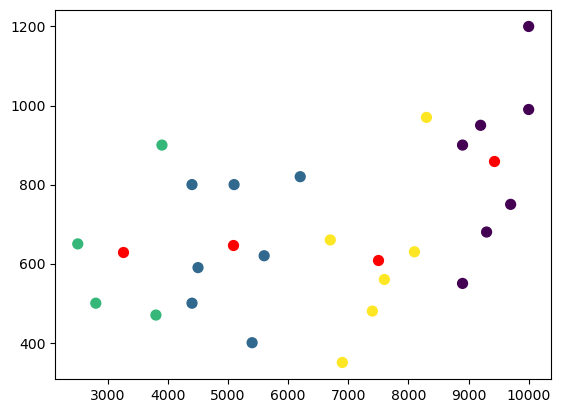

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['Applicant Income'], df['Loan Amount'], c=kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:,0], centroids[:,1], c= "red", s=50)

In [1]:
import pandas as pd
#Create the dataset
#create empty data frame
golf_df = pd.DataFrame()
#add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy',
'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
'overcast', 'rainy']
#add temperature
golf_df ['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
'mild', 'cool', 'mild', 'mild', "mild", "hot", 'mild']
#add humidity
golf_df['Humidity'] = ["high", "high", "high", "high", "normal", "normal", "normal",
"high", "normal", "normal", "normal", "high", "normal", "high"]
#add
golf_df ['Windy'] = ['false', 'true', "false", 'false','false', 'true', 'true',
'false', 'false', 'false', "true", 'true', 'false', 'true']
#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
'yes', 'yes', 'no']
#Print/show the new data
print(golf_df)

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


In [2]:
one_hot_data= pd.get_dummies(golf_df[['Outlook','Temperature','Humidity','Windy']])
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data,golf_df['Play'])
print(tree.export_graphviz(clf_train,None))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="x[6] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 11 ;
12 [label="gini = 0.0\nsam

In [13]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydotplus

dot_data = tree.export_graphviz(clf_train,out_file = None, feature_names = list(one_hot_data.columns.values),class_names = ['Not_Play','Play'],rounded = True, filled =  True)

In [5]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [6]:
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found